In [44]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Create sample data

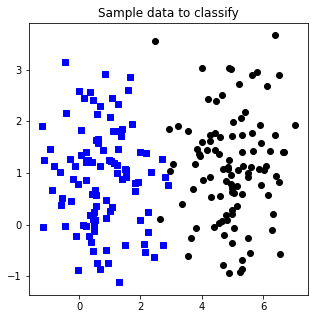

In [45]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('Sample data to classify')
plt.show()

In [46]:
def createANNmodel(learningRate):

  
  ANNclassify = nn.Sequential(
      nn.Linear(2,1),   
      nn.ReLU(),        
      nn.Linear(1,1),   
      #nn.Sigmoid(),    # not needed - we use BCEWithLogitsLoss
        )

  # loss function
  lossfun = nn.BCEWithLogitsLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)
#   optimizer = torch.optim.Adam(ANNclassify.parameters(),lr=learningRate)

  # model output
  return ANNclassify,lossfun,optimizer

In [47]:
numepochs = 100
batch_size = 100


In [48]:
# a function that trains the model
def trainTheModel(ANNmodel):

  # initialize losses
  losses = torch.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):
    
    # forward pass
    yHat = ANNmodel(data)

    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  
  
  
  predictions = ANNmodel(data)
  
    
  # no 0.5 threshold - we use BCEWithLogitsLoss
  # with sigmoid activation function we get 0.5 threshold
  totalacc = 100*torch.mean(((predictions>0) == labels).float())
  
  return losses,predictions,totalacc

Final accuracy: 50%


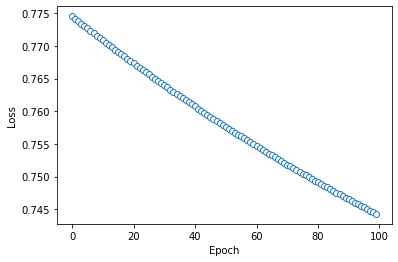

In [49]:
# create everything
ANNclassify,lossfun,optimizer = createANNmodel(.01)

# run it
losses,predictions,totalacc = trainTheModel(ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)


# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()


In [50]:
ANNclassify.eval()

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

# Find the best learning rate

In [51]:
learningrates = np.linspace(.01,.1,10)


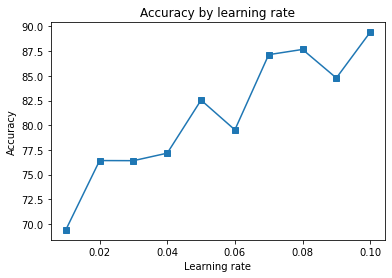

In [53]:
numExps = 50


accMeta = np.zeros((numExps,len(learningrates)))


numepochs = 500


for expi in range(numExps):
  for i,lr in enumerate(learningrates):
    
    
    ANNclassify,lossfun,optimizer = createANNmodel(lr)
    losses,predictions,totalacc = trainTheModel(ANNclassify)

    
    accMeta[expi,i] = totalacc



# now plot the results, averaged over experiments
plt.plot(learningrates,np.mean(accMeta,axis=0),'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()

Repeating the same experinment with different learning rates show average accuracies of model performance.